# Project Assignment - Image Classification Exploiting Sparsity

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, RocCurveDisplay, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from math import isclose
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Data Preparation

In [2]:
# reading data and converting to dataframe
data = pd.read_csv('Project_Data_EE4C12_CE_IMG.csv', header=None)
dataSet = pd.DataFrame(data)

In [3]:
dataSet

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8038,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8039,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8040,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8041,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# dropping row with missing values
dataSet.drop([8042], inplace=True)

In [5]:
dataSet

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8038,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8039,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8040,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
sorted_dataSet = dataSet.sort_values(by=dataSet.columns[0]).reset_index(drop=True)

In [7]:
sorted_dataSet

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8038,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8039,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8040,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# separating features and labels
Y_pd = sorted_dataSet[sorted_dataSet.columns[0]]
X_pd = sorted_dataSet.drop(sorted_dataSet.columns[0], axis=1)

In [9]:
# using numpy arrays instead of pandas dataframes
Y = Y_pd.to_numpy()
X = X_pd.to_numpy()

In [10]:
# function to display image from flattened array (784 -> 28x28)
def create_image(flatImage,imageSize=28):
    image = np.zeros((imageSize,imageSize))
    for i in range(imageSize):
        image[i] = flatImage[(i*imageSize):((i+1)*imageSize)]
    return image

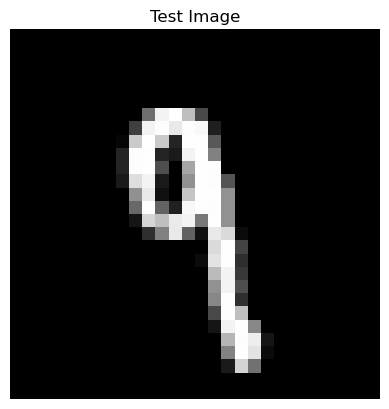

In [11]:
test_image =create_image(X[-1])
plt.imshow(test_image, cmap='gray')  # 'gray' ensures it's displayed in grayscale
plt.title("Test Image")
plt.axis('off')  # Hide axes for clarity
plt.show()

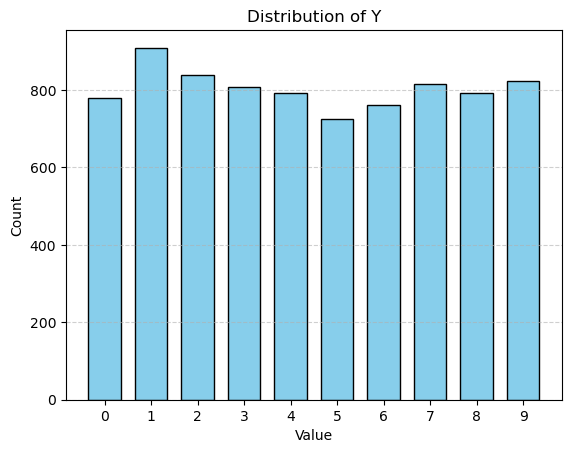

In [12]:
# plotting the amount of samples for each label:
unique, counts = np.unique(Y, return_counts=True)
bar_width = 0.7  # smaller value = more space between bars
plt.bar(unique, counts, width=bar_width, color='skyblue', edgecolor='black')
plt.title("Distribution of Y")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xticks(unique)  # Show each integer on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.savefig("data_histogram.png")
plt.show()

In [13]:
# normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# showing normalization on first 10 features:
print("Mean of X", np.nanmean(X[:10,:],axis=1))
print("Mean of X after z-score normalization", np.nanmean(X_scaled[:10,:],axis=1))

Mean of X [43.0497449  29.78826531 53.02933673 51.17729592 20.80739796 42.69260204
 53.62627551 31.35204082 25.26020408 64.87882653]
Mean of X after z-score normalization [ 0.08349246  0.07635828  0.3579069   0.26946836 -0.16022396  0.06196726
  0.17241118 -0.03253406 -0.11532322  0.28153068]


In [15]:
# train-test split
Test_ratio = 0.2
random_seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=Test_ratio, random_state=random_seed, stratify=Y)

## Model Training

In [16]:
def test_model (model,X,Y):
    Y_pred = model.predict(X)
    accuracy = accuracy_score(Y, Y_pred)
    cm = confusion_matrix(Y, Y_pred)
    return Y_pred, accuracy, cm

### Logistic Regression (with L1 Regularization)

In [17]:
logisticReg = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, random_state=random_seed, C=1.0)
logisticReg.fit(X_train, Y_train)
Y_pred_logReg, accuracy_logReg, cm_logReg = test_model(logisticReg, X_test, Y_test)

C:\Users\kunal\anaconda3\envs\MLforEE\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [20]:
print("Accuracy of logistic regression with L1 regularization: ", accuracy_logReg)
print(classification_report(Y_test, Y_pred_logReg, target_names=[str(i) for i in range(10)]))

Accuracy of logistic regression with L1 regularization:  0.8937228091982597
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       156
           1       0.91      0.96      0.93       182
           2       0.87      0.89      0.88       168
           3       0.86      0.88      0.87       162
           4       0.90      0.87      0.89       158
           5       0.88      0.82      0.85       145
           6       0.92      0.95      0.93       152
           7       0.89      0.87      0.88       163
           8       0.88      0.84      0.86       158
           9       0.88      0.87      0.88       165

    accuracy                           0.89      1609
   macro avg       0.89      0.89      0.89      1609
weighted avg       0.89      0.89      0.89      1609



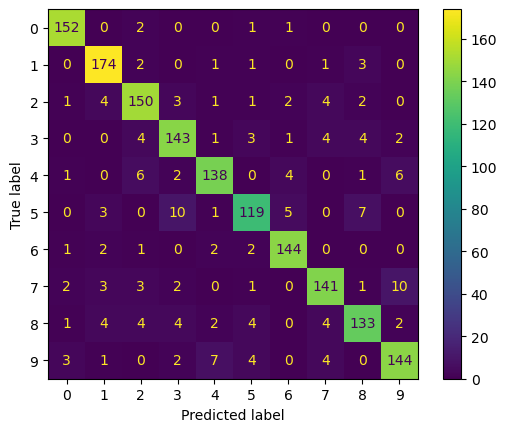

In [22]:
ConfusionMatrixDisplay(cm_logReg, display_labels=range(10)).plot()

In [26]:
np.sum(logisticReg.coef_ == 0)

np.int64(3613)

In [23]:
n_nonzero_logReg = np.sum(logisticReg.coef_ != 0)
sparsity_ratio_logReg = n_nonzero_logReg / logisticReg.coef_.size
print(f"Number of non-zero coefficients in Logistic Regression with L1 regularization: {n_nonzero_logReg}")
print(f"Sparsity ratio in Logistic Regression with L1 regularization: {sparsity_ratio_logReg:.4f}")

Number of non-zero coefficients in Logistic Regression with L1 regularization: 4227
Sparsity ratio in Logistic Regression with L1 regularization: 0.5392
